<a href="https://colab.research.google.com/github/EricXu1728/GoogleAIReader/blob/main/Task_3_Multi_Shots_Gemini_Pro_Reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install google-generativeai==0.3.0
!pip -q install google-ai-generativelanguage==0.4.0
!pip install PyGithub
!pip install pylev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.9/145.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md

2024-01-01 14:45:38.377515: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 14:45:38.377572: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 14:45:38.378689: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 14:45:38.385004: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-01 14:45:39.291803: W tensorflow/compiler/tf2

In [ ]:
'''
import requests

def download_file_from_github(repo_owner, repo_name, file_path, branch='master'):
    base_url = f'https://raw.githubusercontent.com/{repo_owner}/{repo_name}/{branch}/{file_path}'
    response = requests.get(base_url)

    if response.status_code == 200:
        # File found, save it to your local directory or process it as needed
        with open(file_path.split("/")[-1], 'wb') as file:
            file.write(response.content)
        print(f"File '{file_path}' downloaded successfully.")
    else:
        print(f"Failed to download file '{file_path}'. Status code: {response.status_code}")

# Example usage:
repo_owner = 'onwuegbuchulem'
repo_name = 'WEB_SCRAPING_THUMBNAILS'


file_name = "1"

file_path = f'Thumbnail_mapped/Thumbnail256_mapped/01/{file_name}.jpg'

download_file_from_github(repo_owner, repo_name, file_path)

file_path = f'Documents/txt/01/{file_name}.txt'
download_file_from_github(repo_owner, repo_name, file_path)
'''


'\nimport requests\n\ndef download_file_from_github(repo_owner, repo_name, file_path, branch=\'master\'):\n    base_url = f\'https://raw.githubusercontent.com/{repo_owner}/{repo_name}/{branch}/{file_path}\'\n    response = requests.get(base_url)\n\n    if response.status_code == 200:\n        # File found, save it to your local directory or process it as needed\n        with open(file_path.split("/")[-1], \'wb\') as file:\n            file.write(response.content)\n        print(f"File \'{file_path}\' downloaded successfully.")\n    else:\n        print(f"Failed to download file \'{file_path}\'. Status code: {response.status_code}")\n\n# Example usage:\nrepo_owner = \'onwuegbuchulem\'\nrepo_name = \'WEB_SCRAPING_THUMBNAILS\'\n\n\nfile_name = "1"\n\nfile_path = f\'Thumbnail_mapped/Thumbnail256_mapped/01/{file_name}.jpg\'\n\ndownload_file_from_github(repo_owner, repo_name, file_path)\n\nfile_path = f\'Documents/txt/01/{file_name}.txt\'\ndownload_file_from_github(repo_owner, repo_name, fil

## Configuring the Model

In [ ]:
# setup
import google.generativeai as genai
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

GOOGLE_AI_STUDIO = userdata.get('GOOGLE_AI_STUDIO2')

genai.configure(api_key=GOOGLE_AI_STUDIO)

In [ ]:
for m in genai.list_models():
    print(m.name)
    print(m.supported_generation_methods)


models/chat-bison-001
['generateMessage', 'countMessageTokens']
models/text-bison-001
['generateText', 'countTextTokens', 'createTunedTextModel']
models/embedding-gecko-001
['embedText', 'countTextTokens']
models/gemini-pro
['generateContent', 'countTokens']
models/gemini-pro-vision
['generateContent', 'countTokens']
models/embedding-001
['embedContent', 'countTextTokens']
models/aqa
['generateAnswer']


In [ ]:

# Set up the model
generation_config = {
  "temperature": 0.,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]


model = genai.GenerativeModel(model_name="gemini-pro-vision",
                              generation_config=generation_config,
                              safety_settings=safety_settings)


## Using Gemini Pro Vision

In [ ]:
def get_text(file_name):
  file_path = f"{file_name}.txt"
  with open(file_path, 'r') as file:

      # Read the contents of the file and save it in a variable
      return file.read()




In [ ]:
import os
import PIL.Image

def get_image(name):
  if(os.path.exists(f"{name}.png")):
    print(name)
    return PIL.Image.open(f'{name}.png')
  if(os.path.exists(f"{name}.jpg")):
    return PIL.Image.open(f'{name}.jpg')

  print("error occured: unable ti get_image")

In [ ]:
import spacy
# Load the spaCy model with pre-trained word vectors
nlp = spacy.load("en_core_web_md")

def calculate_vector_accuracy(true_text, text):
  doc1 = nlp(true_text)
  doc2 = nlp(text)
  return doc1.similarity(doc2)


sentence1 = "The quick brown fox jumps over the lazy dog."
sentence2 = "A fast brown fox leaps over a sleepy canine."

print(calculate_vector_accuracy(sentence1, sentence2))

0.7671564505194697


In [ ]:
def calculate_word_accuracy_words(ground_truth, recognized_text):
    # Split the ground truth and recognized text into lists of words
    ground_truth_words = ground_truth.split()
    recognized_words = recognized_text.split()

    # Find the intersection of the two lists to get correctly recognized words
    correct_words = set(ground_truth_words) & set(recognized_words)

    # Calculate Word Accuracy
    word_accuracy = len(correct_words) / len(set(ground_truth_words))

    return word_accuracy

# Example usage
ground_truth_text = "the quick brown fox jumps over the lazy dog"
recognized_text = "the quick brown fox jumps over the lazy"

accuracy = calculate_word_accuracy_words(ground_truth_text, recognized_text)
print(f"Word Accuracy: {accuracy:.2f}%")


Word Accuracy: 0.88%


In [ ]:
import pylev
def calculate_word_accuracy_distance(ground_truth, recognized_text):
  ground_truth_words = ground_truth.split()
  recognized_words = recognized_text.split()
  distance =  pylev.levenshtein(ground_truth_words,recognized_words)

  max_string_length = max(len(ground_truth_words), len(recognized_words))
  return 1-(distance/max_string_length)


# Example usage
ground_truth_text = "the quick brown fox jumps over the lazy dog"
recognized_text = "quick the brown fox jumps over the lazy dog the the"

accuracy = calculate_word_accuracy_distance(ground_truth_text, recognized_text)
print(f"Word Accuracty: {accuracy:.2f}")

Word Accuracty: 0.64


In [ ]:
def calculate_word_accuracy_distance_characters(ground_truth, recognized_text):
  distance =  pylev.levenshtein(ground_truth,recognized_text)

  max_string_length = max(len(ground_truth), len(recognized_text))
  return 1-(distance/max_string_length)


# Example usage
ground_truth_text = "the quick brown fox jumps over the lazy dog"
recognized_text = "quick the brown fox jumps over the lazy dog the the"

accuracy = calculate_word_accuracy_distance(ground_truth_text, recognized_text)
print(f"Word Penalty: {accuracy:.2f}")

Word Penalty: 0.64


In [ ]:
def resize_with_aspect_ratio(image, target_width):
    # Calculate the aspect ratio
    aspect_ratio = image.width / image.height

    # Calculate the corresponding height based on the target width
    target_height = int(target_width / aspect_ratio)

    # Resize the image while maintaining the aspect ratio
    resized_image = image.resize((target_width, target_height))

    return resized_image

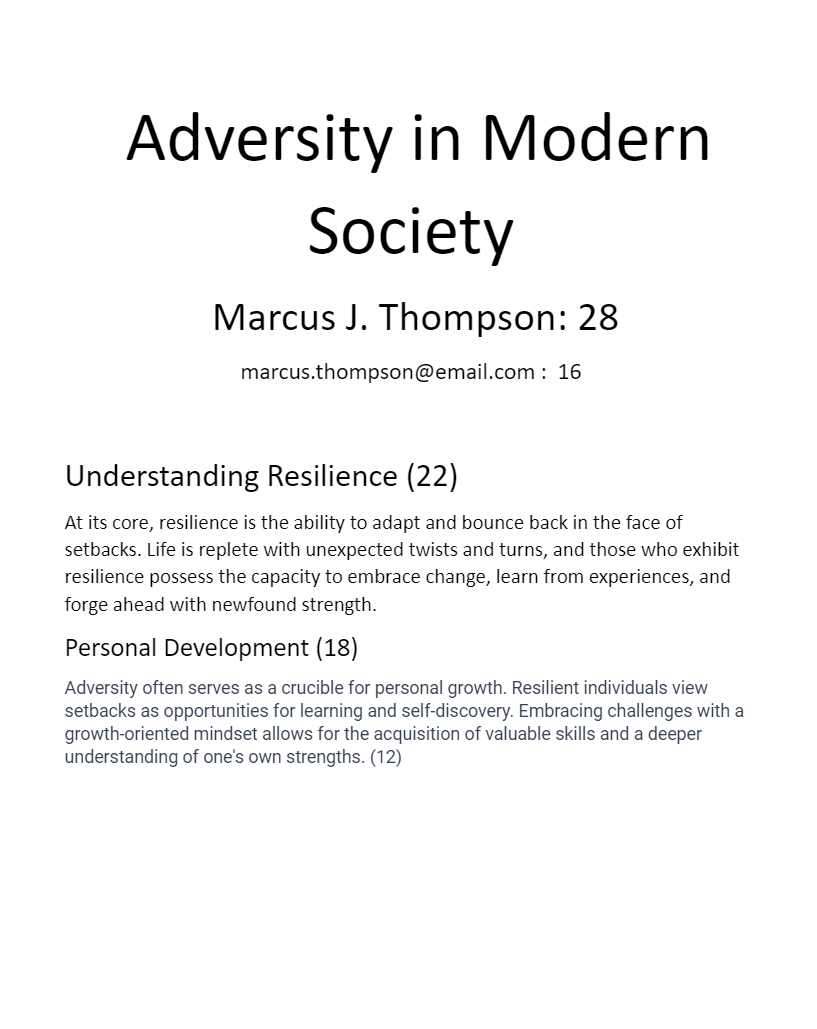

 Adversity in Modern Society
Marcus J. Thompson: 28
marcus.thompson@email.com: 16

Understanding Resilience (22)
At its core, resilience is the ability to adapt and bounce back in the face of setbacks. Life is replete with unexpected twists and turns, and those who exhibit resilience possess the capacity to embrace change, learn from experiences, and forge ahead with newfound strength.

Personal Development (18)
Adversity often serves as a crucible for personal growth. Resilient individuals view setbacks as opportunities for learning and self-discovery. Embracing challenges with a growth-oriented mindset allows for the acquisition of valuable skills and a deeper understanding of one's own strengths. (12)


In [ ]:
from PIL import Image
img =  Image.open("/content/drive/MyDrive/thumbnails/adversity.png")
display(img)
response = model.generate_content(["You are provided with an extremely compressed snapshot of the first page of a Word document. Your goal is to identify and return all the words present in the image. If there are any gaps or areas where the text is not recognizable, you should fill in those gaps with predicted words. Analyze the compressed image and identify all the words that are visible. If there are any regions where the text is not recognizable, generate and fill in those gaps with predicted words based on context. Return all of the text, including those predicted in the gaps. Respond in plain text.", img])
response.resolve()
print(response.text)

In [ ]:
def add_2d_lists(list1, list2):
    # Find dimensions of the input lists
    rows1, cols1 = len(list1), len(list1[0])
    rows2, cols2 = len(list2), len(list2[0])

    # Pad smaller list with zeros if necessary
    if rows1 > rows2:
        list2 += [[0] * cols2 for _ in range(rows1 - rows2)]
    elif rows1 < rows2:
        list1 += [[0] * cols1 for _ in range(rows2 - rows1)]

    if cols1 > cols2:
        list2 = [row + [0] * (cols1 - cols2) for row in list2]
    elif cols1 < cols2:
        list1 = [row + [0] * (cols2 - cols1) for row in list1]

    # Add corresponding elements
    result = [[list1[i][j] + list2[i][j] for j in range(cols1)] for i in range(rows1)]

    return result

In [ ]:
def divide_2d_array(matrix, divisor):
    # Use nested list comprehension to divide each element by the divisor
    result = [[element / divisor for element in row] for row in matrix]
    return result

In [ ]:
from pathlib import Path
def get_image_bytes(file_name):
  image = 0
  if (img := Path(f"{file_name}.png")).exists():
    return Path(f"{file_name}.png").read_bytes()
  if (img := Path(f"{file_name}.jpg")).exists():
    return Path(f"{file_name}.jpg").read_bytes()
  raise FileNotFoundError(f"Could not find image: {file_name}")


In [ ]:
from pathlib import Path
import io
def get_image_bytes(file_name, size):
  image = get_image(file_name)
  image = resize_with_aspect_ratio(image, size)
  image_bytes_io = io.BytesIO()
  image.save(image_bytes_io, format='PNG')  # Save as PNG format to ensure the desired signature
  image = image_bytes_io.getvalue()
  return image





In [ ]:


def multi_shot_prompt(shot_list, prediciton_name, size):

  image_names = shot_list.copy()
  image_names.append(prediciton_name)

  image_parts = []
  for name in image_names:
    image = get_image_bytes(name,size)

    image_parts.append({
        "mime_type": "image/png",
        "data": image
    })

  prompt_parts = [
      "You are tasked with reading text from blurry images."
  ]

  for i in range(len(image_parts)):
    prompt_parts.append(f"Image {i+1}: ")
    prompt_parts.append(image_parts[i])

  truth_text = "\n"
  for i in range(len(shot_list)):
    truth_text += f"\n\nText in image{i+1}"
    truth_text += f"\"{get_text(shot_list[i])}\""
  truth_text += f"What is the text in image {len(shot_list)+1}? Respond below: \n\n"

  prompt_parts.append(truth_text)


  return image_parts, prompt_parts

In [ ]:
def get_multi_shot_prompts(list_of_images, size):
  shot_2Dlist = []
  prediciton_name_list = []

  for i in range(len(list_of_images)):
    list_copy = list_of_images.copy()
    prediciton_name_list.append(list_copy.pop(i))
    shot_2Dlist.append(list_copy)


  prompts = []

  for i in range(len(prediciton_name_list)):
    image_parts, prompt_parts = multi_shot_prompt(shot_2Dlist[i], prediciton_name_list[i], size)
    prompts.append(prompt_parts)

  return prompts, prediciton_name_list

In [ ]:
def run_multi_shot_prompts(mprompts):
  responses = []
  for prompt in mprompts:
    response = model.generate_content(prompt)
    print(response.text)
    responses.append(response.text)

  return responses

In [ ]:
def judge_predicitions(resonses, prediciton_name_list):
  distance = 0
  vector = 0
  for i in range(len(prediciton_name_list)):
    truth = get_text(prediciton_name_list[i])

    distance += (calculate_word_accuracy_distance(truth, responses[i]))
    vector += (calculate_vector_accuracy(truth, responses[i]))

  distance/=len(prediciton_name_list)
  vector/=len(prediciton_name_list)

  return distance, vector

In [ ]:
def get_no_shot(name_list, size):

  no_shot_responses = []

  for name in name_list:
    pack_name = [name]

    prompts, prediciton_name_list = get_multi_shot_prompts(pack_name, size)
    print(prompts)
    responses = run_multi_shot_prompts(prompts)
    no_shot_responses.append(responses[0])

  return no_shot_responses

In [ ]:
sizes = [256, 96, 48]
name_list = ["/content/drive/MyDrive/thumbnails/adversity", "/content/drive/MyDrive/thumbnails/climb", "/content/drive/MyDrive/thumbnails/creativity", "/content/drive/MyDrive/thumbnails/education", "/content/drive/MyDrive/thumbnails/technology"]


In [ ]:
no_shot_responses2d = []
i=0
for size in sizes:
  print("TURN: "+str(i))
  i+=1
  no_shot_responses = get_no_shot(name_list, size)
  no_shot_responses2d.append(no_shot_responses)

TURN: 0
/content/drive/MyDrive/thumbnails/adversity
[['You are tasked with reading text from blurry images.', 'Image 1: ', {'mime_type': 'image/png', 'data': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x00\x00\x00\x01B\x08\x06\x00\x00\x00\x1e\xe2\x03\x01\x00\x00\x8cmIDATx\x9c\xec\x9dwx\\\xd5\x99\xb8\xdf\xe9\x1a\xcdH\xa3\xde\xbbe\xd9\x92e\xd9\x92{\xaf@\x00\x1bL\t-\x94\x046\t\x90\xce&a7\xd9l*\xa9\xa4nv\x93,,YJ\x08\xa6\xba`\x83\x8d\xbb\xe5*\xc9\x92,\xc9\xea\xbd\x8f\xa4)\x9a\xd1\xf4\x99\xf3\xfbC\xe8\xfe,d\xc0\xb0\xb6\x81\xe8\xbe\xcf\xe3\xc7\xf6\x9ds\xcf=\xe7\xdcs\xbe{\xce\xf9\xbe\xf3}\n!\x84@FFfZ\xa2\xfc\xa8\x0b ##\xf3\xd1!\x0b\x00\x19\x99i\x8c,\x00dd\xa61\xb2\x00\x90\x91\x99\xc6\xc8\x02@Ff\x1a#\x0b\x00\x19\x99i\x8c,\x00dd\xa61\xb2\x00\x90\x91\x99\xc6\xc8\x02@Ff\x1a#\x0b\x00\x19\x99i\x8c,\x00dd\xa61\xb2\x00\x90\x91\x99\xc6\xc8\x02@Ff\x1a#\x0b\x00\x19\x99i\x8c,\x00dd\xa61\xb2\x00\x90\x91\x99\xc6\xc8\x02@Ff\x1a#\x0b\x00\x19\x99i\x8c,\x00dd\xa61\xb2\x00\x90\x91\x99\xc6\xc8\x02@Ff\x1a#\x

In [ ]:
name_list = ["/content/drive/MyDrive/thumbnails/adversity", "/content/drive/MyDrive/thumbnails/climb", "/content/drive/MyDrive/thumbnails/creativity", "/content/drive/MyDrive/thumbnails/education", "/content/drive/MyDrive/thumbnails/technology"]

multi_shot_responses2d = []
prediciton_name_list = []
for size in sizes:
  prompts, prediciton_name_list = get_multi_shot_prompts(name_list, size)
  responses = run_multi_shot_prompts(prompts)
  multi_shot_responses2d.append(responses)



/content/drive/MyDrive/thumbnails/climb
/content/drive/MyDrive/thumbnails/creativity
/content/drive/MyDrive/thumbnails/education
/content/drive/MyDrive/thumbnails/technology
/content/drive/MyDrive/thumbnails/adversity
/content/drive/MyDrive/thumbnails/adversity
/content/drive/MyDrive/thumbnails/creativity
/content/drive/MyDrive/thumbnails/education
/content/drive/MyDrive/thumbnails/technology
/content/drive/MyDrive/thumbnails/climb
/content/drive/MyDrive/thumbnails/adversity
/content/drive/MyDrive/thumbnails/climb
/content/drive/MyDrive/thumbnails/education
/content/drive/MyDrive/thumbnails/technology
/content/drive/MyDrive/thumbnails/creativity
/content/drive/MyDrive/thumbnails/adversity
/content/drive/MyDrive/thumbnails/climb
/content/drive/MyDrive/thumbnails/creativity
/content/drive/MyDrive/thumbnails/technology
/content/drive/MyDrive/thumbnails/education
/content/drive/MyDrive/thumbnails/adversity
/content/drive/MyDrive/thumbnails/climb
/content/drive/MyDrive/thumbnails/creativity

In [ ]:
multi_shot_scores = []
for responses in multi_shot_responses2d:
  accuracies = judge_predicitions(responses, prediciton_name_list)
  multi_shot_scores.append(accuracies)


In [ ]:
no_shot_scores = []
for responses in no_shot_responses2d:
  accuracies = judge_predicitions(responses, prediciton_name_list)
  no_shot_scores.append(accuracies)


In [ ]:
print(no_shot_responses2d)
print(len(no_shot_responses2d))

[[" Adversity in Modern Society\nMarcus J. Thompson: 28\nmarcus.thompson@email.com: 16\n\nUnderstanding Resilience (22)\nAt its core, resilience is the ability to adapt and bounce back in the face of setbacks. Life is replete with unexpected twists and turns, and those who exhibit resilience possess the capacity to embrace change, learn from experiences, and forge ahead with newfound strength.\n\nPersonal Development (18)\nAdversity often serves as a crucible for personal growth. Resilient individuals view setbacks as opportunities for learning and self-discovery. Embracing challenges with a growth-oriented mindset allows for the acquisition of valuable skills and a deeper understanding of one's own strengths.", ' Climate Change Awareness\nOlivia K. Henderson: 28\ndaniel.turner@email.com: 16\n\nConscious Consumerism (22)\nClimate change awareness has given rise to a new era of conscious consumerism, with individuals increasingly seeking products and services that align with environment

In [ ]:
print(multi_shot_scores)
print(no_shot_scores)

[(0.9413194499083032, 0.9992550389057202), (0.19132655873976087, 0.9812665887821252), (0.09924457107948297, 0.9615046567009861)]
[(0.931869302164084, 0.9973346572348755), (0.09365000607113536, 0.8809803346831382), (0.05333084716530538, 0.775083846992446)]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def draw_data(catagories, data_list, prompts, title):

  prompt_count = len(prompts)
  # Set up figure and axis
  fig, ax = plt.subplots()

  # Bar width
  bar_width = 0.2

  # Set positions for the bars
  bar_positions = np.arange(len(catagories))


  for i in range(prompt_count):
    # Plot the bars with transparency
    print(i)
    ax.bar(bar_positions+(i/8), data_list[i], width=bar_width, label=prompts[i], alpha=0.95, zorder = i*20)


  # Set labels and title
  ax.set_xlabel('Catagories')
  ax.set_ylabel('Accuracy')
  ax.set_title(title)
  ax.set_xticks(bar_positions)
  ax.set_xticklabels(catagories, rotation = 90)
  ax.legend()
  # Show the plot
  plt.show()

0
1


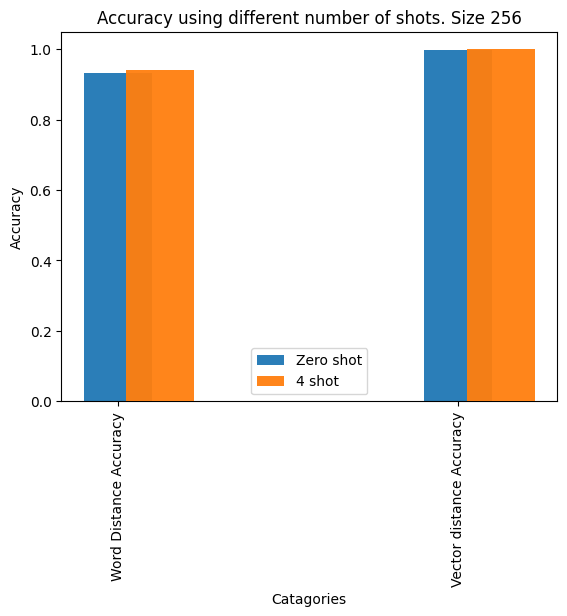

In [ ]:
number = 0
draw_data(["Word Distance Accuracy", "Vector distance Accuracy"], [no_shot_scores[number],multi_shot_scores[number]], ["Zero shot", "4 shot"], f"Accuracy using different number of shots. Size {sizes[number]}")

0
1


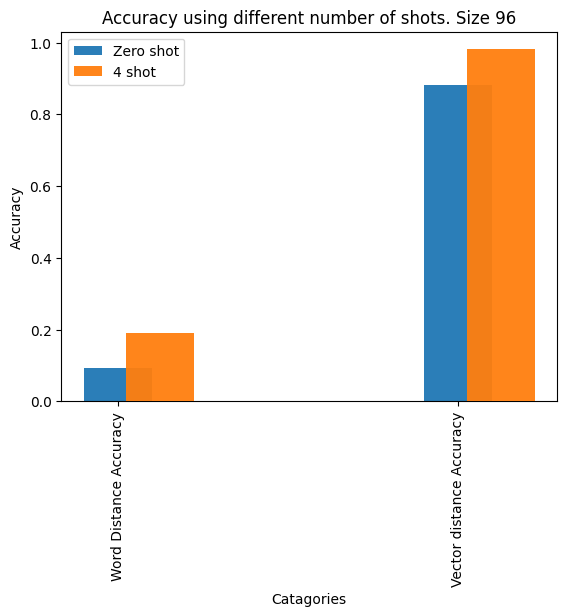

In [ ]:
number = 1
draw_data(["Word Distance Accuracy", "Vector distance Accuracy"], [no_shot_scores[number],multi_shot_scores[number]], ["Zero shot", "4 shot"], f"Accuracy using different number of shots. Size {sizes[number]}")

0
1


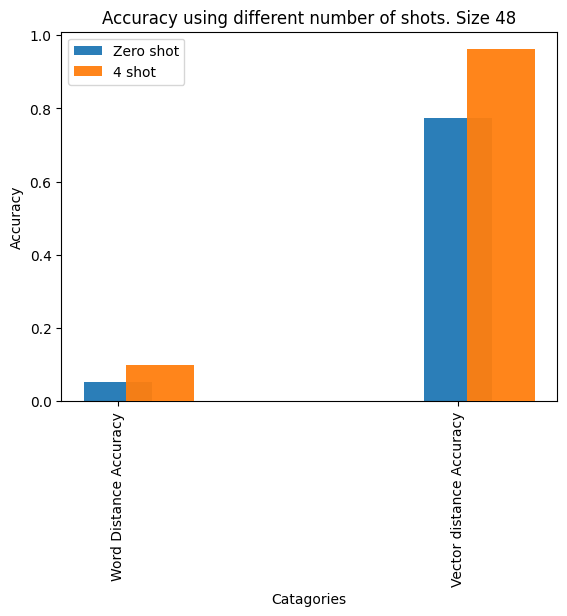

In [ ]:
number = 2
draw_data(["Word Distance Accuracy", "Vector distance Accuracy"], [no_shot_scores[number],multi_shot_scores[number]], ["Zero shot", "4 shot"], f"Accuracy using different number of shots. Size {sizes[number]}")